In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

plt.rcParams["figure.figsize"] = [15,10]

ImportError: No module named basemap

In [ ]:
# Resolution of boundary database to use. Can be c (crude), l (low), i (intermediate), h (high), f (full) or None
def set_basemap(min_lat, max_lat, min_lon, max_lon, res='h'):
    avg_lon = (min_lon + max_lon)/2
    avg_lat = (min_lat + max_lat)/2
    m = Basemap(projection='merc', lat_0=avg_lat, lon_0=avg_lon, llcrnrlat=min_lat ,urcrnrlat=max_lat, llcrnrlon=min_lon,urcrnrlon=max_lon, lat_ts=avg_lat, resolution=res)
    m.drawcountries(zorder=-10)
    m.drawcoastlines( color='grey', zorder=-10, linewidth=0.2 )
    m.drawmapboundary(color='#c7ebfc', fill_color='#c7ebfc', zorder=-20)
    m.fillcontinents(color='#bcffbd',lake_color='#c7ebfc', zorder=-12)
    return m
        
def set_sattelite_basemap(min_lat, max_lat, min_lon, max_lon, res='c'):
    avg_lon = (min_lon + max_lon)/2
    avg_lat = (min_lat + max_lat)/2
    m = Basemap(projection='merc',llcrnrlat=min_lat ,urcrnrlat=max_lat, llcrnrlon=min_lon,urcrnrlon=max_lon,lat_ts=avg_lat,resolution=res, epsg=3857) #3857,4326
    m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True, zorder=-11)
    return m

In [ ]:
m = set_basemap(50.6576237858589, 53.683238548719416, 3.187321861267037, 7.510441978454537, res='h')

m.readshapefile(shapefile='gem_2016_wgs', name='gemeente')

# hardenberg = Polygon(m.gemeente[89],facecolor='blue',edgecolor='blue',linewidth=1)
# enschede = Polygon(m.gemeente[87],facecolor='green',edgecolor='green',linewidth=1)
# plt.gca().add_patch(hardenberg)
# plt.gca().add_patch(enschede)


# 92 : Kampen
# 93 : Kampen
# 94 : Kampen
# 95 : Kampen
# 96 : Kampen
# 97 : Kampen
# 98 : Kampen
# 99 : Kampen

plt.gca().add_patch( Polygon(m.gemeente[4],facecolor='blue',edgecolor='blue',linewidth=1) )

plt.show()

In [ ]:
for i in range(len(m.gemeente_info)):
    print( i,':',m.gemeente_info[i]['GM_NAAM'] )
#     if m.gemeente_info[i]['GM_NAAM'] == 'Enschede':
#         print(i)
#         break

# print(m.gemeente[i])

In [4]:
m.gemeente[105]

# import shapefile

# def draw_shape_file():
#     ctr = shapefile.Reader('gem_2016_wgs')

#     geomet = ctr.shapeRecords() #will store the geometry separately
#     transform_list = []
#     for entry in geomet:
#         temp_point_list = []
#         for point in entry.shape.points:
#             temp_point_list.append( m( point[0],point[1] ) )
#         transform_list.append(temp_point_list)
    
#     plt.plot([i[0] for i in transform_list], [i[1] for i in transform_list])
    
    
# ctr = shapefile.Reader('gem_2016_wgs')
# geomet = ctr.shapeRecords()
# first = geomet[0] #will extract the first polygon to a new object
# first.shape.points #will show you the points of the polygon
#     # first.record #will show you the attributes
#     temp = m( first.shape.points[0][0],first.shape.points[0][1] )
#     temp

[(190844.84245686323, 216244.94582339516),
 (190860.47085651814, 216243.3227729234),
 (190870.65297900938, 216247.598854654),
 (190870.86703600633, 216247.68877726467),
 (190870.9343360554, 216247.7168747005),
 (190871.0007584464, 216247.72803214798),
 (190871.24034826178, 216247.76844157977),
 (190875.567605037, 216248.49685865687),
 (190875.8621072541, 216248.5466720541),
 (190876.02671569725, 216248.57420778135),
 (190876.19251495643, 216248.55243246304),
 (190876.46878286605, 216248.51581210317),
 (190876.48794150873, 216248.513249557),
 (190879.5377647863, 216248.1099029039),
 (190890.1165935113, 216246.7108010766),
 (190905.25453770586, 216231.43128451938),
 (190981.11033230845, 216155.04421053315),
 (191067.89588217667, 216067.8444881118),
 (191088.62494413435, 216046.73137167515),
 (191171.63110339848, 215962.79204061208),
 (191205.66864540803, 215929.00977135682),
 (191231.00580787013, 215903.15930198645),
 (191231.0996733359, 215903.06361750746),
 (191254.55287592282, 215879.

In [5]:
import sqlite3
# https://location.services.mozilla.com/downloads
# https://mozilla.github.io/ichnaea/import_export.html

In [127]:
conn = sqlite3.connect('cell2.db')
# cell.db: radio TEXT, mcc NUM, net NUM, area NUM, cell NUM, unit NUM, lon NUM, lat NUM, range NUM
# cell2.db: radio TEXT, mcc NUM, net NUM, area NUM, cell NUM, unit NUM, lon NUM, lat NUM, range NUM, samples NUM, changeable NUM, created NUM, updated NUM
# ex:  LTE, 204, 8, 123445, 23243423, ???, lon, lat, range (m)
# queryTotal = "select distinct(area) from cells where mcc == {0} and net == {1};"
queryTotal = "select cell, area, lon, lat, range from cells where mcc == {0} and net == {1} and lon > 3 and lon < 7.5 and radio like 'GSM' and samples > 10;"
# queryTotal = "select count(distinct(area)) from cells where mcc == {0} and net == {1} and lon > 3 and lon < 7.5;"
net = 8 #kpn=8, 10, 12, 69 (subset???), vodafone=4, t-mobile= 16, 98 
mcc = 204 #nederland
cursor = conn.execute(queryTotal.format(mcc, net))
area_dict = dict()
for row in cursor:
#         resultsTotal.append(row[0])
    if row[1] not in area_dict:
        area_dict[ row[1] ] = []
    area_dict[ row[1] ].append( (row[2],row[3]) )
#     print(row)
print(area_dict.keys())

dict_keys([3200, 3330, 3460, 3990, 1288, 3210, 3340, 15885, 3470, 3160, 530, 3220, 3350, 3480, 3100, 3230, 3360, 3110, 3240, 3370, 3120, 3080, 3250, 3380, 3130, 3260, 3390, 6240, 3140, 3270, 3400, 3980, 1228, 3150, 3280, 3410, 3030, 3032, 1252, 3290, 3420, 3040, 6040, 3170, 227, 3300, 3430, 3050, 3180, 3310, 3440, 60403, 3060, 3190, 3320, 3450, 3070])


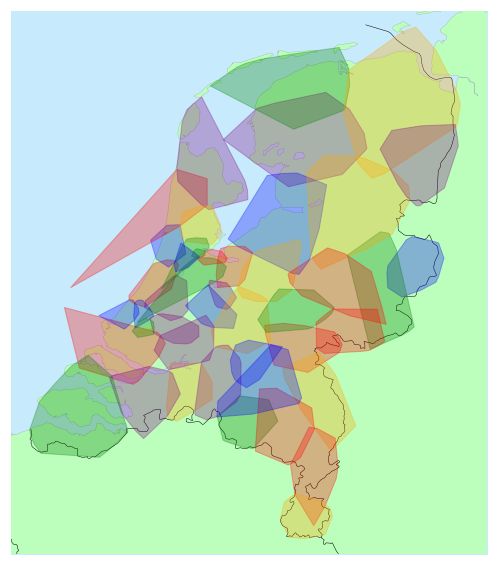

In [128]:
from scipy.spatial import ConvexHull
# m = set_basemap(52.02520095497037, 52.5935420752564, 6.202654325924641, 7.144731962643391, res='h')

# m.readshapefile(shapefile='TopGrenzen-prov-actueel_wgs84', name='prov_grezen')
# pos = m(6.857999999999947,52.235)
# plt.scatter(pos[0],pos[1], s=200, zorder=-2)

# points = []
# for loc in area_dict[60201]:
#     points.append( m(loc[0],loc[1]) )
    
# plt.gca().add_patch( points_to_poly(points, color='blue') )


# for loc in area_dict[60201]:
#     pos = m(loc[0],loc[1])
#     plt.scatter(pos[0],pos[1], s=50, c='red', zorder=-2)
    
# for loc in area_dict[60203]:
#     pos = m(loc[0],loc[1])
#     plt.scatter(pos[0],pos[1], s=50, c='green', zorder=-2)

# NUM_COLORS = 8
# cm = plt.get_cmap('gist_rainbow')
# cm = plt.get_cmap('nipy_spectral')
# colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
colors = ['red','blue','green','purple','orange']
i = 0
for lac in area_dict:
    points = []
    if len(area_dict[lac]) > 20: # dont plot mini lacs....
        for loc in area_dict[lac]:
            pos = m(loc[0],loc[1])
            if pos not in points:
                points.append( pos )
        if len(points) > 2:
#             plt.scatter([i[0] for i in points], [i[1] for i in points], s=50, zorder=-2, alpha=0.2) # c=colors[i%len(colors)], 
            plt.gca().add_patch( points_to_poly(points, color=colors[i%len(colors)]) )
            i += 1

plt.show()

In [103]:
def points_to_poly(points, color='blue'):
    hull = ConvexHull(points)
    poly_points = []
    for i in hull.vertices:
        poly_points.append( points[i] )

    return Polygon(poly_points,facecolor=color,edgecolor=color,linewidth=1, alpha=0.3)